<a href="https://colab.research.google.com/github/lomovtsevp/non-linear-dynamic-systems/blob/main/lab10_PZND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=5>***Ломовцев Павел ИМБО-01-19***

<font size=5>***Практика 10. Фрактальная размерность и вычислительные алгоритмы ее оценки на примере функций Вейерштрасса, Мандельброта и простейшей модели имитации броуновского движения.***

In [251]:
import scipy.integrate as integr            
import numpy as np                          
import matplotlib.pyplot as plt
import seaborn as sns

stat_dpi=90
dynamics_pics = (6, 3)
rect_pics = (8, 8)
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

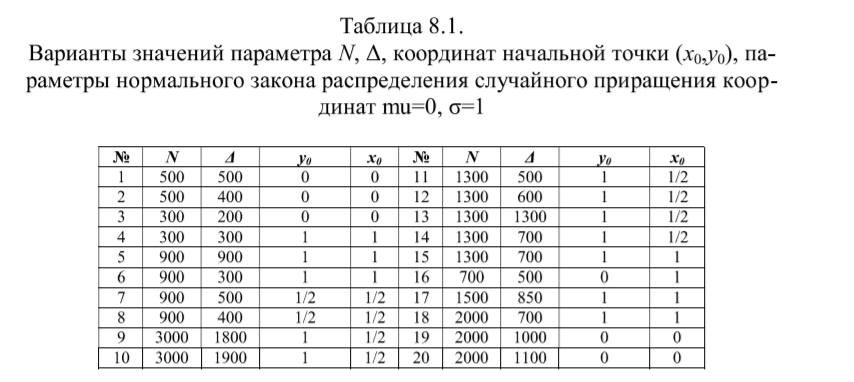

Инициализация начальными точками векторов $x_0 = 0.5, y_0 = 0.5$ и значения $N=900$

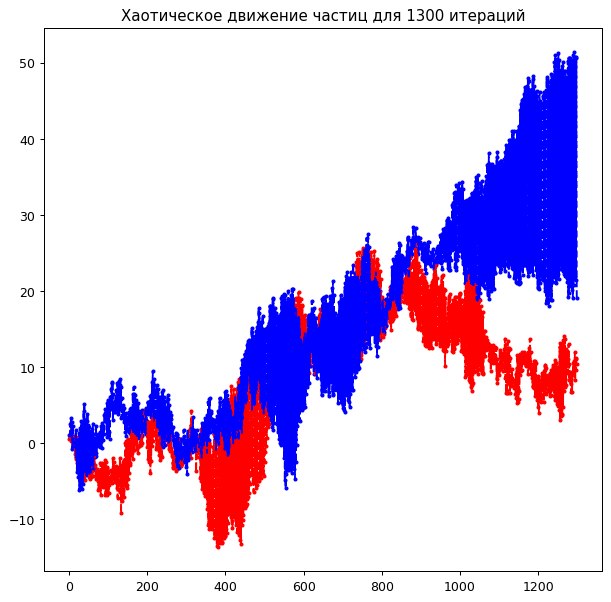

In [252]:
x = []
y = []
x.append(0.5)
y.append(1)

iterations = np.arange(1, 1300, 1)

for i in range(len(iterations) - 1):
  x.append(x[i-1] + np.random.normal(size=1))
  y.append(y[i-1] + np.random.normal(size=1))


fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
plt.title(f'Хаотическое движение частиц для {len(iterations) + 1} итераций')
plt.scatter(iterations, x, color='red', s=5)
plt.scatter(iterations, y, color='blue', s=5)
plt.plot(iterations, x, color='red', ls='dashed')
plt.plot(iterations, y, color='blue', ls='dashed')
plt.show()

##А затем для 1000000 итераций.


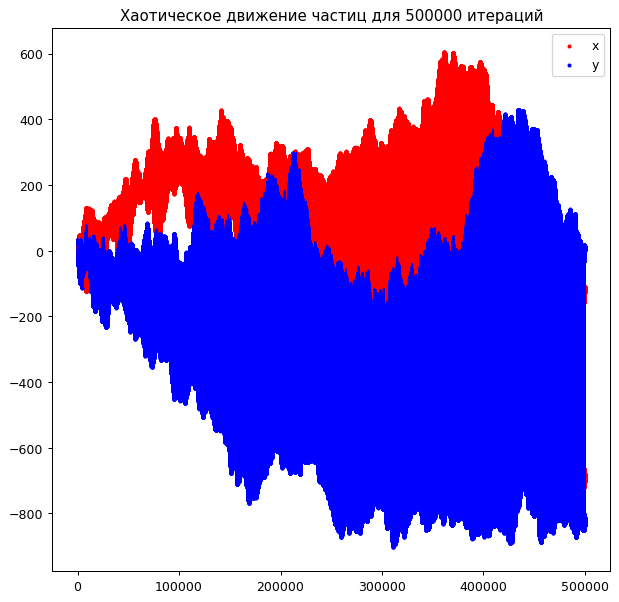

In [253]:
x = []
y = []
x.append(0.5)
y.append(1)
N = 500000
iterations = np.arange(1, N, 1)

for i in range(len(iterations) - 1):
  x.append(x[i-1] + np.random.normal(size=1))
  y.append(y[i-1] + np.random.normal(size=1))


fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
plt.title(f'Хаотическое движение частиц для {len(iterations) + 1} итераций')
plt.scatter(iterations, x, color='red', s=5)
plt.scatter(iterations, y, color='blue', s=5)
plt.legend(['x', 'y'])
plt.plot(iterations, x, color='red', ls='dashed')
plt.plot(iterations, y, color='blue', ls='dashed')
plt.show()

<font size=5>***Если увеличивать количество итераций(например, 1000000 итераций), то хаотическое движение частиц начнет покрывать плоскость полностью.***

Построим график на плоскости $(x, y)$

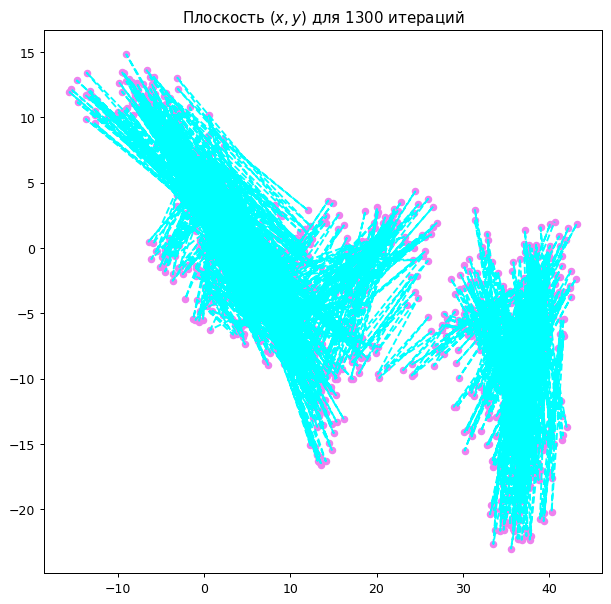

In [254]:
x = []
y = []
x.append(0.5)
y.append(1)
N = 1300
iterations = np.arange(0, N, 1)

for i in range(len(iterations) - 1):
  x.append(x[i-1] + np.random.normal(size=1))
  y.append(y[i-1] + np.random.normal(size=1))


fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
plt.title(f'Плоскость $(x,y)$ для {len(iterations)} итераций')
plt.scatter(x, y, s=25, color='violet')
plt.plot(x, y, color='cyan', ls='dashed')
plt.show()

Алгоритм Ричардсона и Фёдера

In [255]:
#Richardson, delta = 500

delta = 500
N = 1300

deltaX, Ls = [], []

for j in range(1, delta + 1):
  m = int(np.floor(N / j))
  deltax = (x[1] - x[0]) / N * j
  r = np.sqrt((y[N-1] - y[(m * j) - 1]) ** 2 + (x[N-1] - x[(m * j) - 1]) ** 2)
  L = 0
  for n in range(1, m):
    L += np.sqrt((y[n * j] - y[(n - 1) * j]) ** 2 + deltax ** 2) + r
  Ls.append(np.log(L))
  deltaX.append(np.log(deltax))

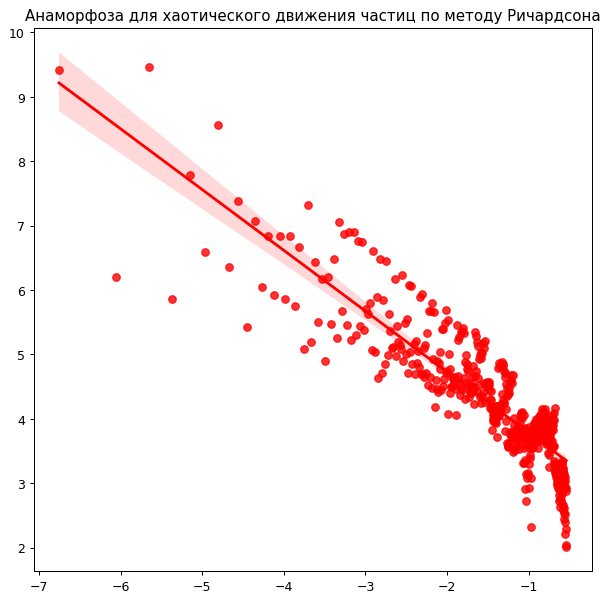

In [256]:
fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
plt.title('Анаморфоза для хаотического движения частиц по методу Ричардсона')
sns.regplot(deltaX, Ls, color='red');

In [257]:
#Phoeder, delta=500

delta = 500

def eps(x, n):
  return int(len(x) / n)

def N(x, y, n):
  xx = []
  dk = []
  m = M = 100
  for i in range(n):
    for k in range(M + 1):
      xx.append(x[1] + eps(x, n) * i)
      xx.append(x[1] + eps(x, n) * (i + 1))
      delta = (xx[-1] - xx[-2]) / M
      dk.append(y[int(np.ceil(xx[i] + delta * k))])
      del xx[-1]
    A = (max(dk) - min(dk)) / eps(x, n)
    m += np.ceil(A)
  return m 

In [258]:
D1 = np.abs((np.log(np.abs(N(x, y, 200))) - np.log(np.abs(N(x, y, 20)))) / (-np.log(eps(x, 200) + np.log(eps(x, 20))))) + 1

In [259]:
print(f'Вычисленное значение фрактальной размерности D = {D1[0]}' )

Вычисленное значение фрактальной размерности D = 1.5179030963336677
